# Comparison of attack rates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from base_model import simulate as base_simulate
from day_and_night.model import simulate as two_way_simulate
from grab_data import *
import matplotlib.pyplot as plt

In [23]:
DATASET = 'CENSUS_LAD11'
SAMPLES = 50
flow_matrix = get_matrix(DATASET, full=True)
population_sizes = get_population_sizes(DATASET)
population_names = get_population_ordering(DATASET)
total_pop = population_sizes.sum()
params = dict(beta=1.8, gamma=0.45, psi=2 / 3, flow_matrix=flow_matrix, population_sizes=population_sizes,
              t_delta=1 / 12,
              t_max=100, seed=0, seed_amount=1)

In [24]:
two_way_sim = two_way_simulate(**params, model='perfect')
base_sim = base_simulate(**params, model='random')
two_way_incidence =  -1 * np.diff(two_way_sim[0].sum(axis=(1,2)), axis=0)
base_incidence =  -1 * np.diff(base_sim[0].sum(axis=(1,2)), axis=0)

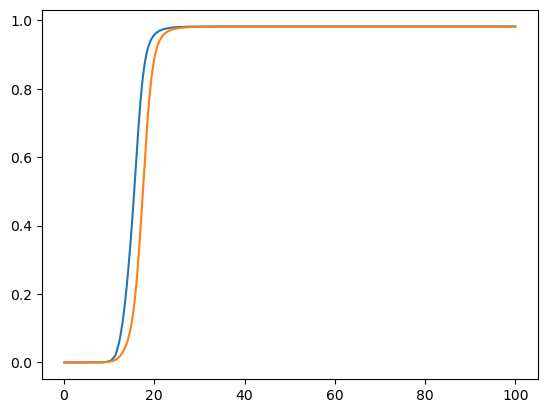

In [26]:
plt.plot(two_way_sim[-1][1::],np.cumsum(two_way_incidence)/total_pop)
plt.plot(two_way_sim[-1][1::],np.cumsum(base_incidence)/total_pop)
plt.show()